<div id='Chapter1'></div>

## Import the libraries and load the dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.layers import Dense, MaxPool2D, Flatten, Conv2D, Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [5]:
import io
Test = pd.read_csv(io.BytesIO(uploaded['test.csv']))


In [6]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [7]:
import io
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))


In [8]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
Test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
sns.set(palette="Paired")
plt.rcParams['figure.dpi'] = 120

In [11]:
train_y=train['label']
train_x=train.drop(labels = ["label"],axis = 1)
train_y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

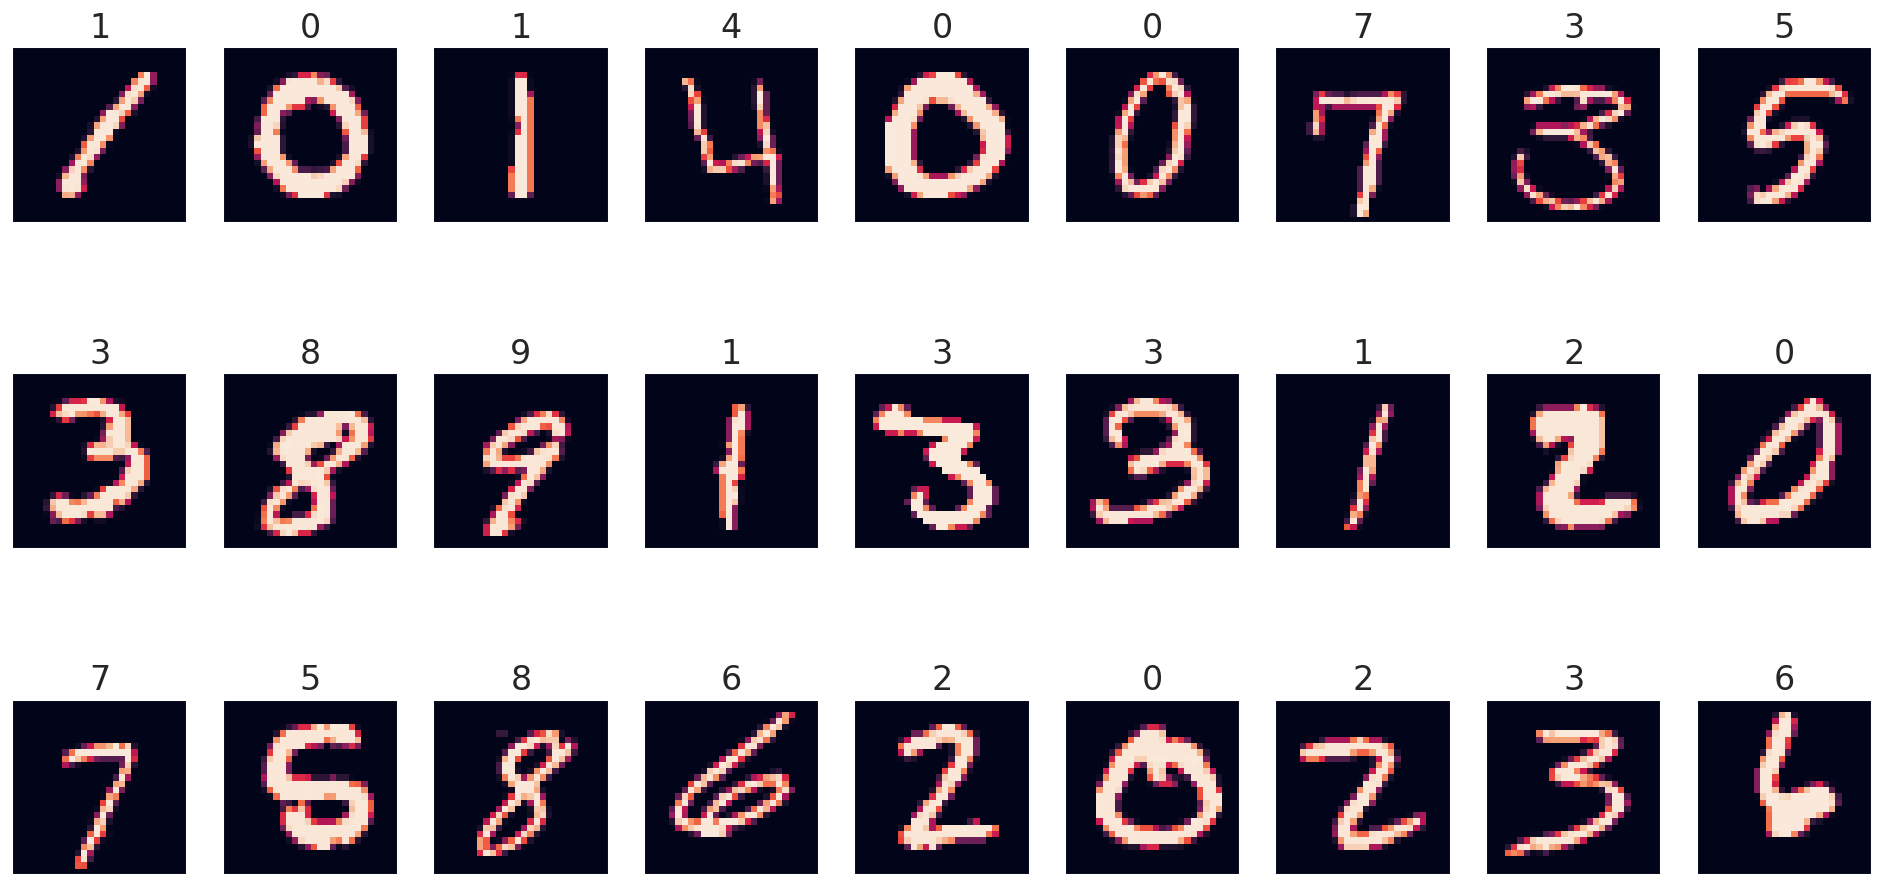

In [12]:
plt.figure(figsize=(20, 10))
for i in range(27):
    plt.subplot(3, 9, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x.iloc[i].to_numpy().reshape((28,28,1)))
    plt.title(train_y[i],size = 20)
plt.show()

In [13]:
a = dict(train['label'].value_counts())
a = dict(sorted(a.items()))

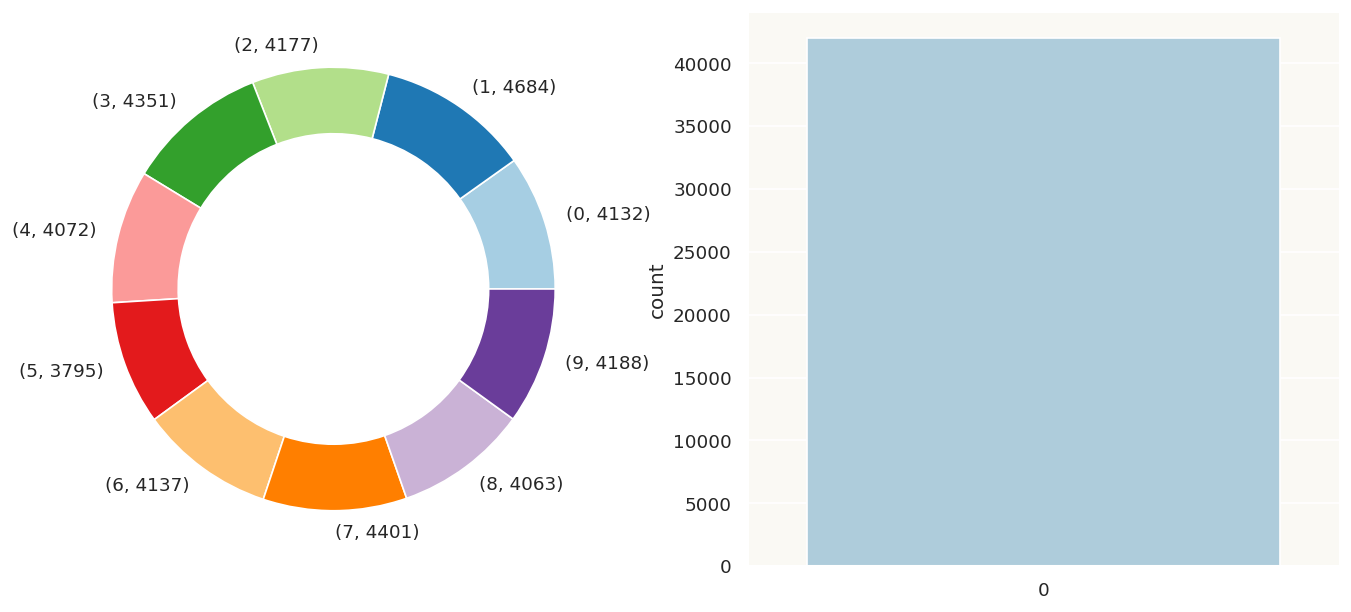

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(14,6))
background_color = '#faf9f4'
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax1.pie(a.values(),wedgeprops=dict(width=0.3, edgecolor='w') ,labels=a.items(), radius=1)
ax2 = sns.countplot(train['label'])
plt.show()

In [15]:
train_x = train_x/255.0
test = Test/255.0
print("X_train Shape  : ",train_x.shape)
print("Test Shape     : ",train_y.shape)

X_train Shape  :  (42000, 784)
Test Shape     :  (42000,)


In [16]:
train_x = train_x.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("X_train Shape  : ",train_x.shape)
print("Test Shape     : ",train_y.shape)

X_train Shape  :  (42000, 28, 28, 1)
Test Shape     :  (42000,)


In [17]:
x_train,x_val,y_train,y_val = train_test_split(train_x,train_y,test_size = 0.2,random_state = 12345)

In [18]:
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((33600, 28, 28, 1), (8400, 28, 28, 1), (33600,), (8400,))

In [19]:
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [21]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),metrics =['accuracy'])

In [22]:
history = model.fit(
    x_train,
    y_train,
    batch_size=1000,
    epochs=30,
    verbose=1,
    validation_data=(x_val,y_val),
)

Epoch 1/30
34/34 [==============================] - 10s 256ms/step - loss: 1.4541 - accuracy: 0.5460 - val_loss: 0.5205 - val_accuracy: 0.8563
Epoch 2/30
34/34 [==============================] - 8s 226ms/step - loss: 0.4847 - accuracy: 0.8454 - val_loss: 0.2395 - val_accuracy: 0.9339
Epoch 3/30
34/34 [==============================] - 8s 248ms/step - loss: 0.3008 - accuracy: 0.9070 - val_loss: 0.1638 - val_accuracy: 0.9521
Epoch 4/30
34/34 [==============================] - 8s 249ms/step - loss: 0.2256 - accuracy: 0.9303 - val_loss: 0.1229 - val_accuracy: 0.9638
Epoch 5/30
34/34 [==============================] - 8s 222ms/step - loss: 0.1832 - accuracy: 0.9424 - val_loss: 0.0996 - val_accuracy: 0.9712
Epoch 6/30
34/34 [==============================] - 8s 248ms/step - loss: 0.1566 - accuracy: 0.9506 - val_loss: 0.0887 - val_accuracy: 0.9743
Epoch 7/30
34/34 [==============================] - 8s 247ms/step - loss: 0.1413 - accuracy: 0.9560 - val_loss: 0.0831 - val_accuracy: 0.9755
Epoch

In [23]:
print('Loss     : {} \nAccuracy : {}'.format(history.history['loss'][-1],history.history['accuracy'][-1]))

Loss     : 0.04745025932788849 
Accuracy : 0.9840773940086365


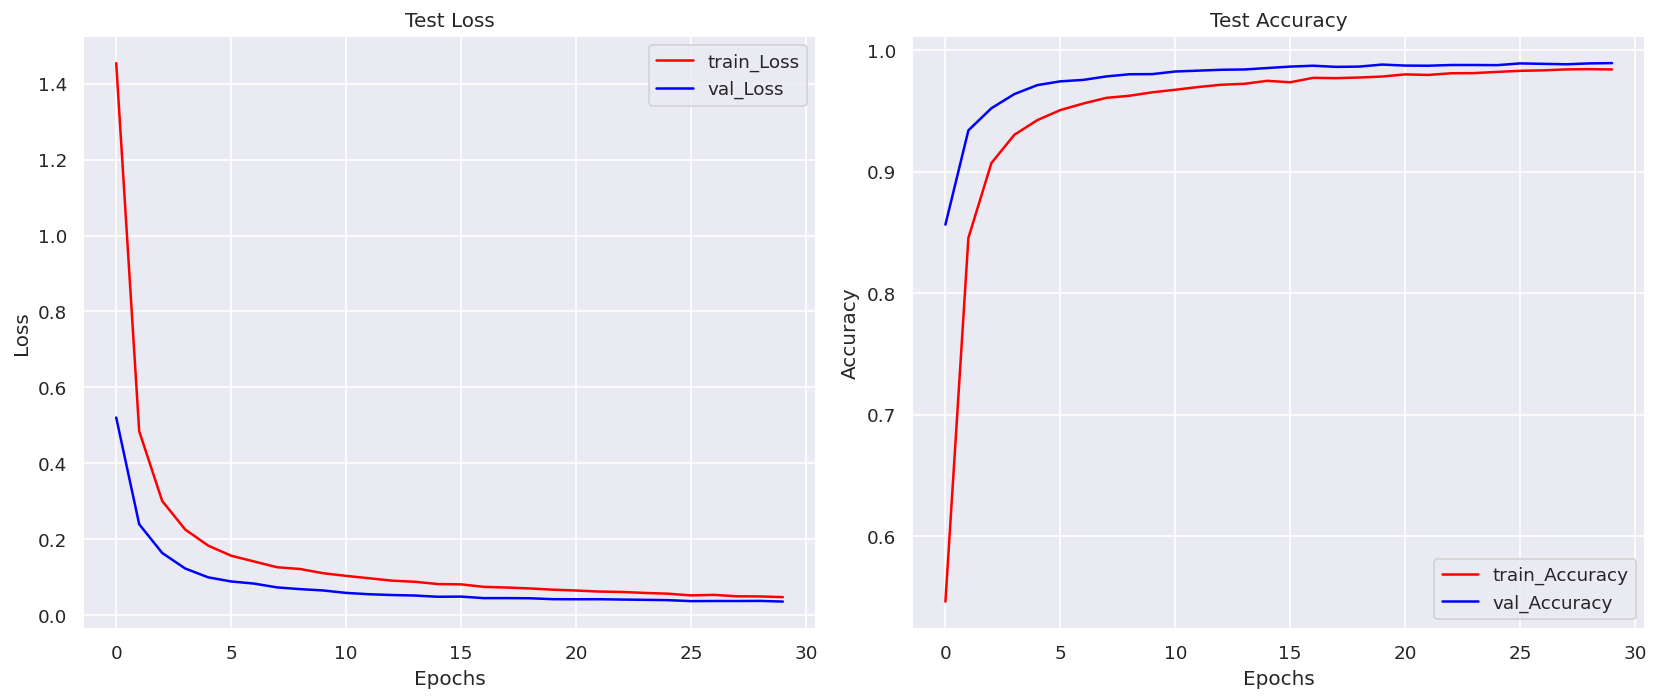

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(14,6))

ax1.plot(history.history['loss'], color='r', label="train_Loss")
ax1.plot(history.history['val_loss'], color='b', label="val_Loss")
ax1.legend()
ax1.set_title("Test Loss")
ax1.set_ylabel("Loss")
ax1.set_xlabel("Epochs")

ax2.plot(history.history['accuracy'], color='r', label="train_Accuracy")
ax2.plot(history.history['val_accuracy'], color='b', label="val_Accuracy")
ax2.legend()
ax2.set_title("Test Accuracy")
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("Epochs")
fig.tight_layout()

263/263 [==============================] - 1s 4ms/step


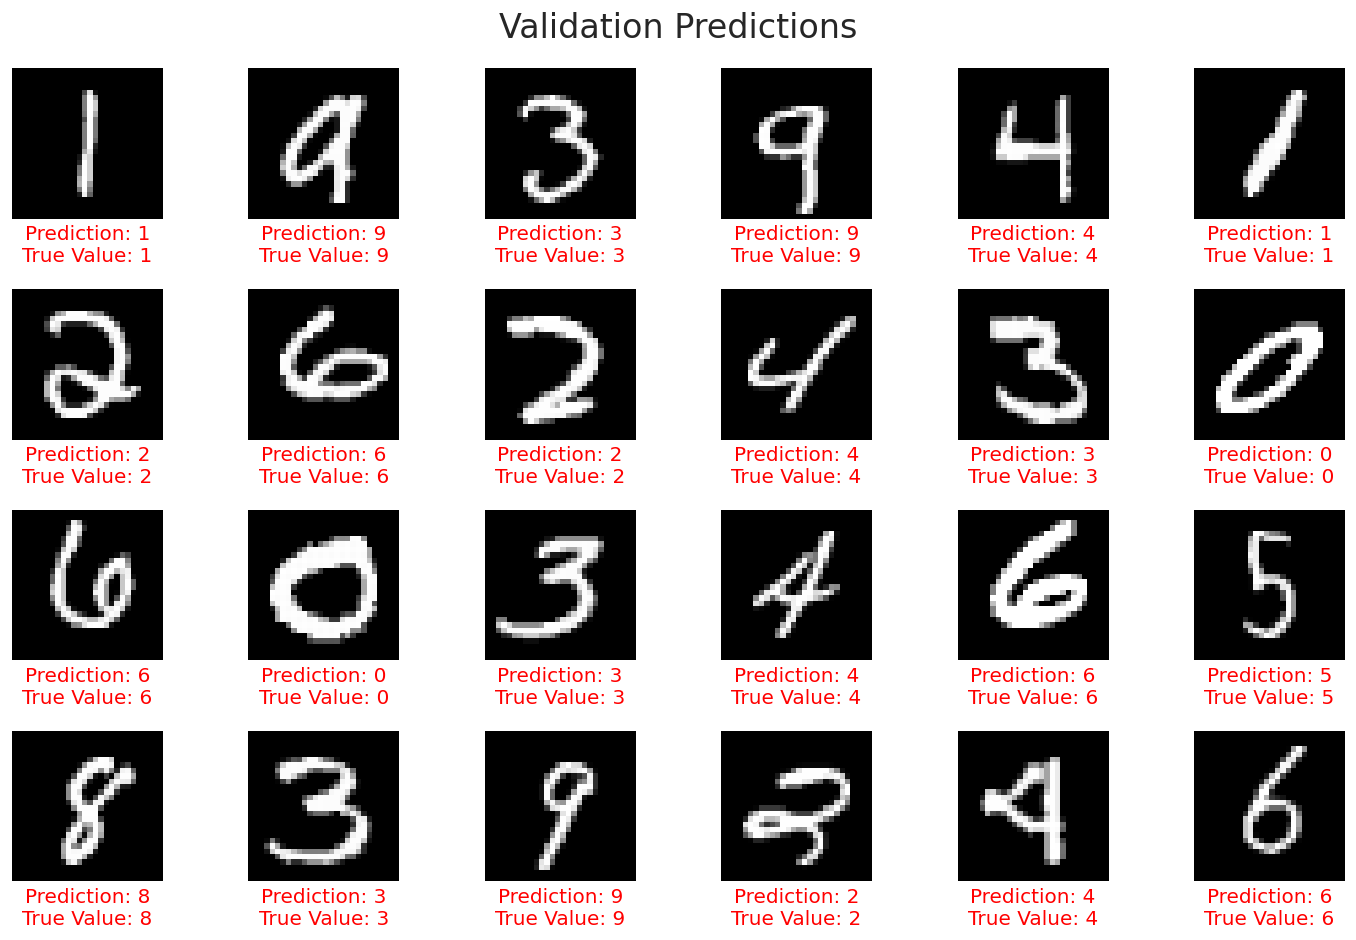

In [25]:
Y_pred = model.predict(x_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.array(y_val)
rows = 4
cols = 6
f = plt.figure(figsize=(2*cols,2*rows))
f.suptitle("Validation Predictions", fontsize=20)
for i in range(rows*cols):
    f.add_subplot(rows,cols,i+1)
    img = x_val[i]
    img = img.reshape((28,28))
    plt.imshow(img,
               cmap='gray')
    plt.axis("off")
    plt.title("Prediction: {}\nTrue Value: {}".format(Y_pred_classes[i], Y_true[i]),
              y=-0.35,color="red")
f.tight_layout()

f.show()

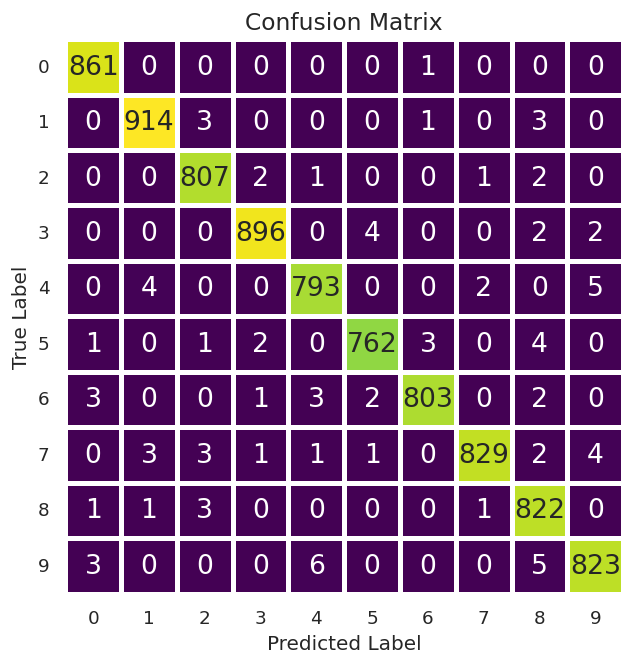

In [26]:
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

f,ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_mtx, annot=True,
            linewidths=3,cmap="viridis",
            fmt= '.0f',ax=ax,
            cbar = False,
           annot_kws={"size": 16})
plt.yticks(rotation = 0)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 14)
plt.show()

875/875 [==============================] - 4s 4ms/step


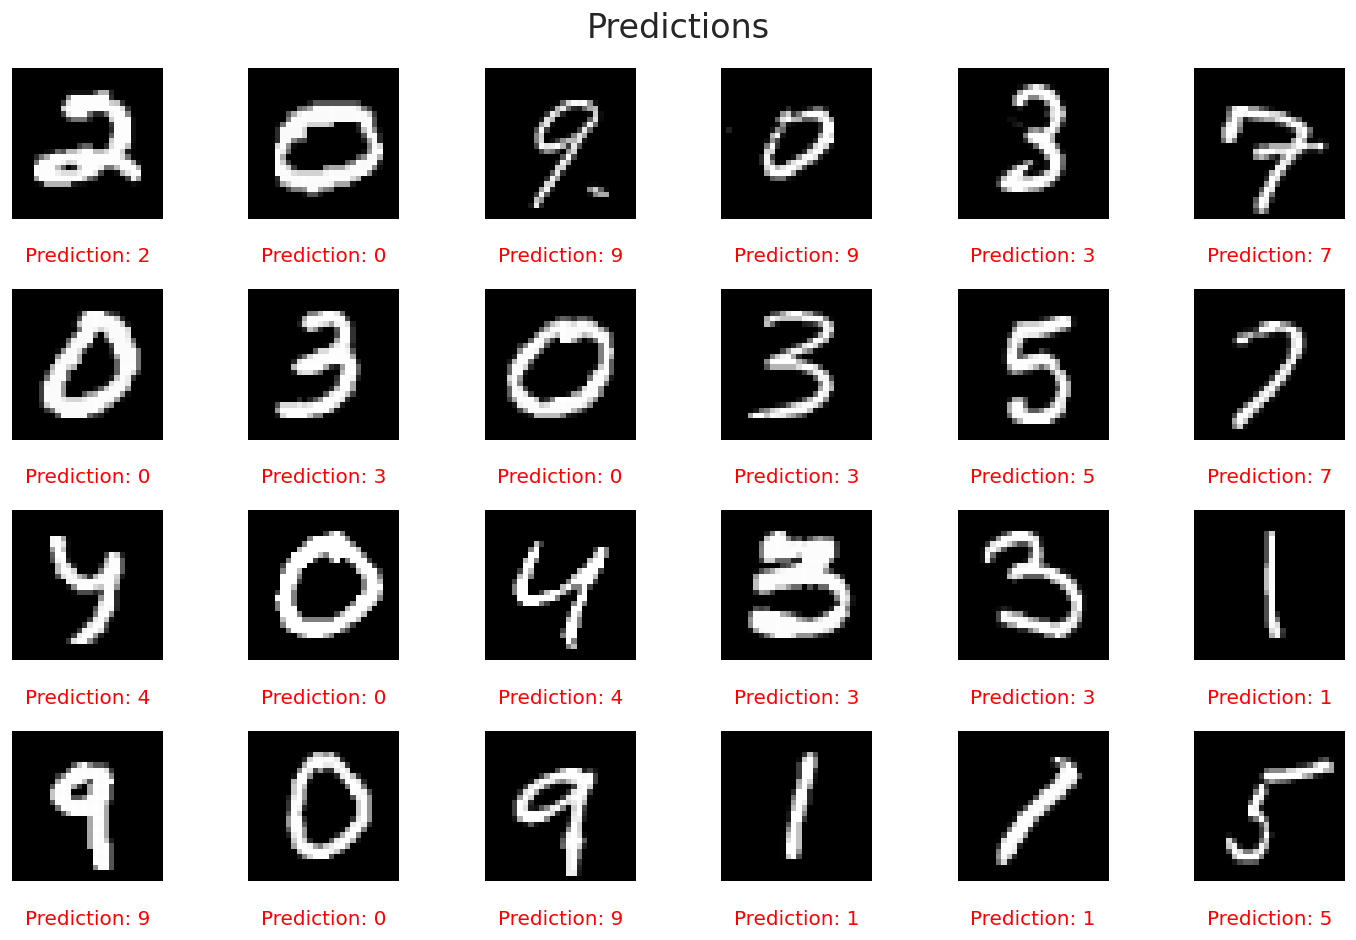

In [27]:
Y_pred = model.predict(test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
rows = 4
cols = 6
f = plt.figure(figsize=(2*cols,2*rows))
f.suptitle("Predictions", fontsize=20)
for i in range(rows*cols):
    f.add_subplot(rows,cols,i+1)
    img = test[i]
    img = img.reshape((28,28))
    plt.imshow(img,
               cmap='gray')
    plt.axis("off")
    plt.title("Prediction: {}".format(Y_pred_classes[i]),
              y=-0.35,color="red")
f.tight_layout()

f.show()

In [28]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission.csv


In [29]:
import io
submission = pd.read_csv(io.BytesIO(uploaded['sample_submission.csv']))

In [30]:
submission = pd.DataFrame({'ImageId': range(1,28001), 'Label': Y_pred_classes})
submission.to_csv('sample_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [32]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


## **98.75% accuracy**
